In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v
0,-0.3240,-0.2591,-0.3683,2002-01-01,-0.009006,0.006095,-0.006708
1,-0.3240,-0.2552,-0.3706,2002-01-02,-0.009006,0.009995,-0.009008
2,-0.3170,-0.2552,-0.3736,2002-01-03,-0.002006,0.009995,-0.012008
3,-0.3071,-0.2532,-0.3745,2002-01-04,0.007894,0.011995,-0.012908
4,-0.2990,-0.2535,-0.3775,2002-01-05,0.015994,0.011695,-0.015908
...,...,...,...,...,...,...,...
360,-0.2323,-0.1972,-0.3055,2002-12-27,0.082694,0.067995,0.056092
361,-0.2309,-0.1965,-0.3066,2002-12-28,0.084094,0.068695,0.054992
362,-0.2289,-0.1947,-0.3091,2002-12-29,0.086094,0.070495,0.052492
363,-0.2309,-0.1925,-0.3068,2002-12-30,0.084094,0.072695,0.054792


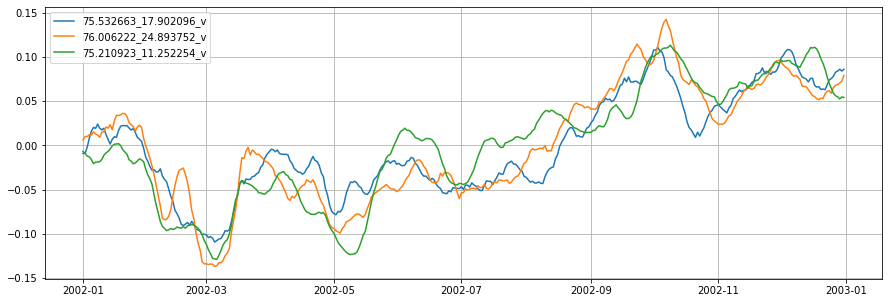

In [4]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v')
plt.legend()
plt.grid()
plt.show()

## Частотная оценка ряда

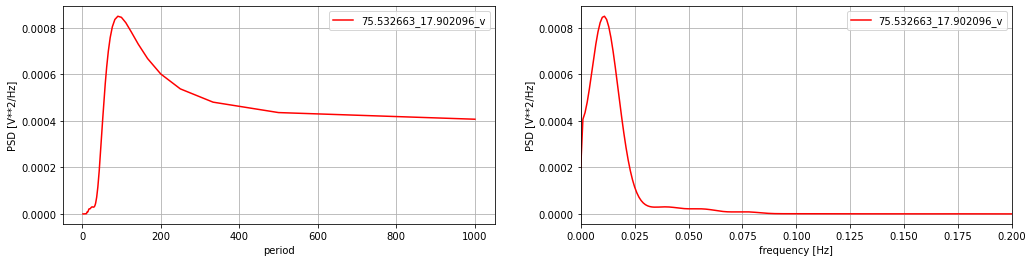

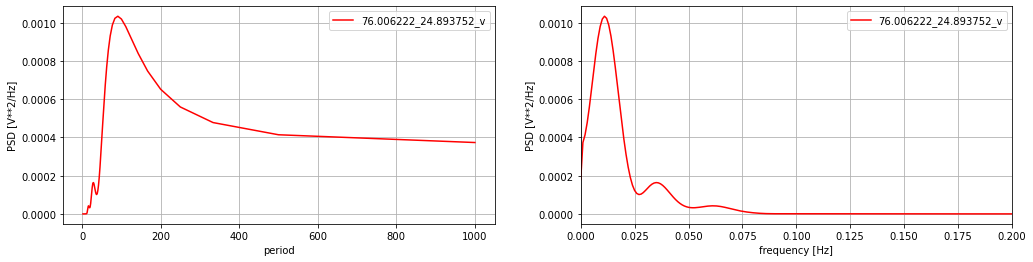

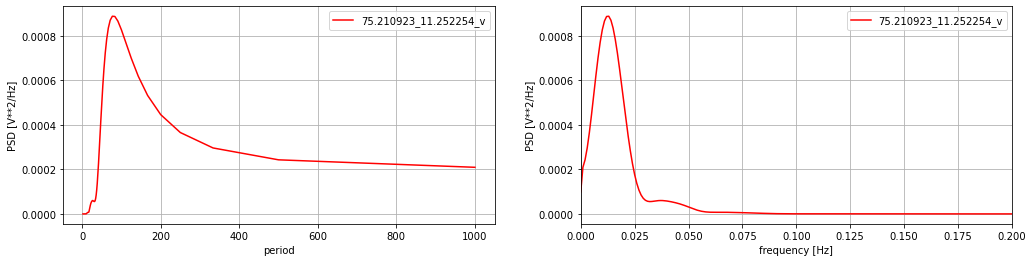

In [5]:
plt.rcParams['figure.figsize'] = [17, 4]

b_f, b_Pxx_den = signal.welch(df_rean['75.532663_17.902096_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['76.006222_24.893752_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['75.210923_11.252254_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

## Оценка цикличности и остатков

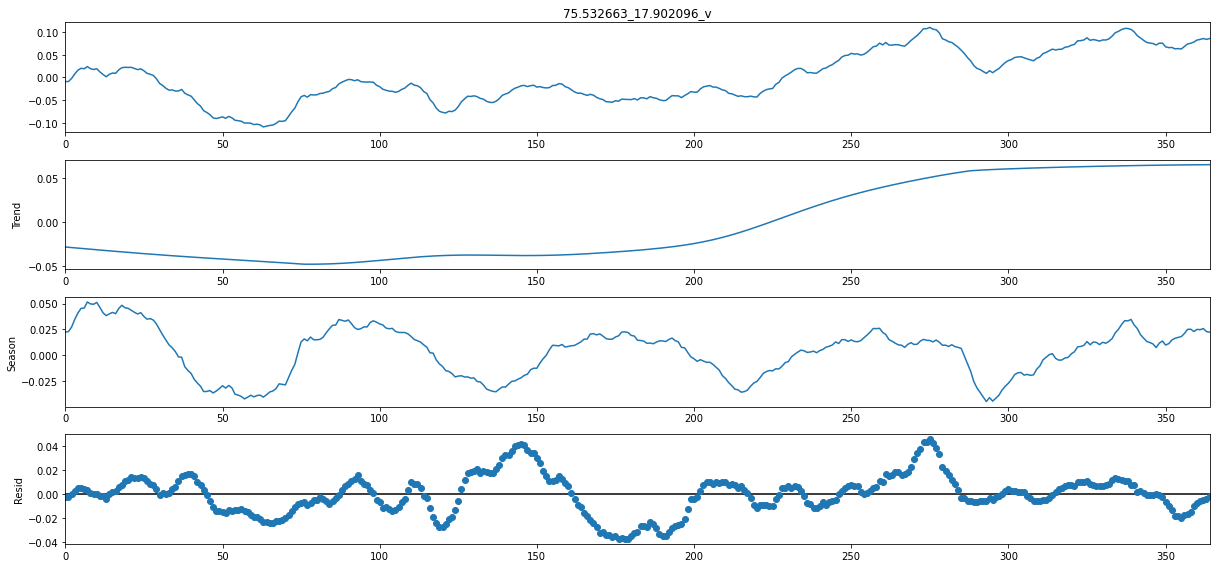

In [6]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.532663_17.902096_v'], period=80)
res = stl.fit()
fig = res.plot()

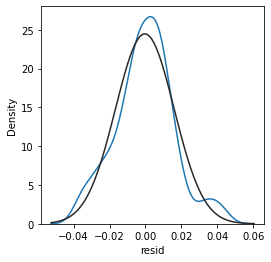

KstestResult(statistic=0.05508411917625955, pvalue=0.21015702158802652)


In [7]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.532663_17.902096_v']-res.resid
    df_rean['75.532663_17.902096_no_res']=ds_no_resid
else:
    df_rean['75.532663_17.902096_no_res']=df_rean['75.532663_17.902096_v']

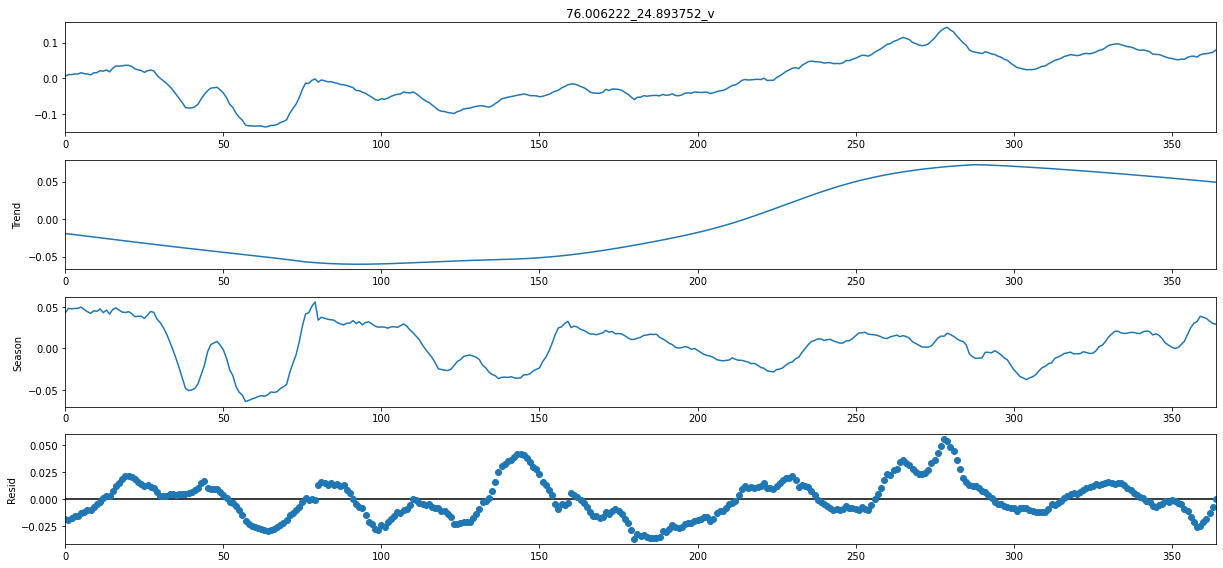

In [8]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['76.006222_24.893752_v'], period=80)
res = stl.fit()
fig = res.plot()

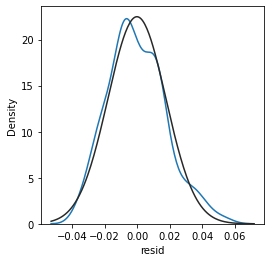

KstestResult(statistic=0.05284405853816432, pvalue=0.2509231878726714)


In [9]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['76.006222_24.893752_v']-res.resid
    df_rean['76.006222_24.893752_no_res']=ds_no_resid
else:
    df_rean['76.006222_24.893752_no_res']=df_rean['76.006222_24.893752_v']

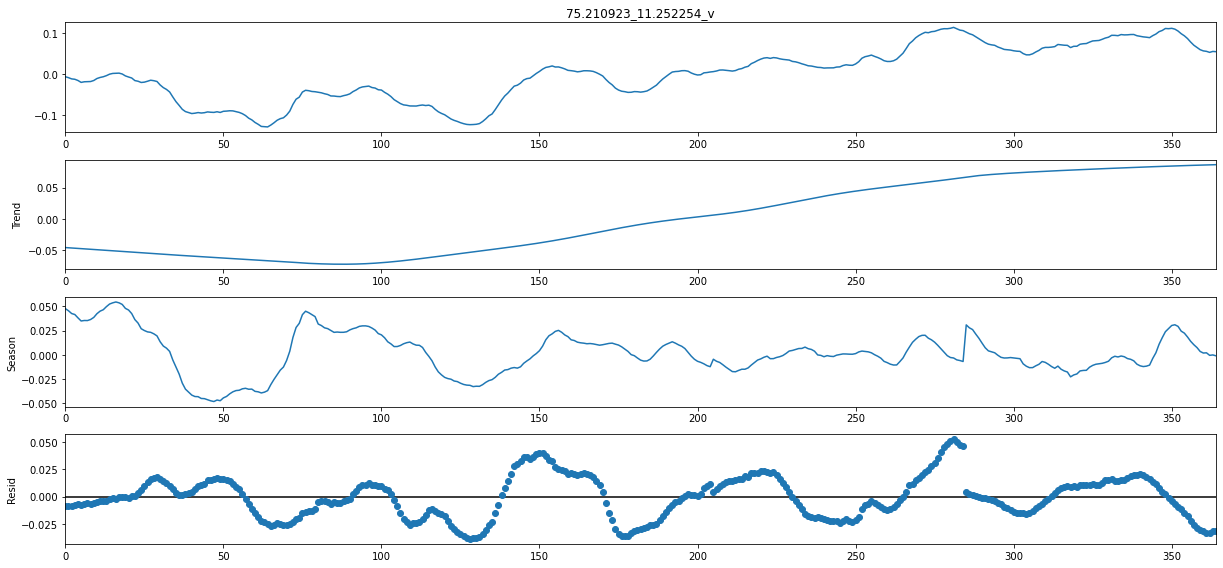

In [10]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.210923_11.252254_v'], period=80)
res = stl.fit()
fig = res.plot()

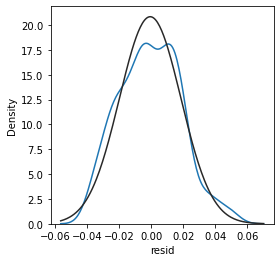

KstestResult(statistic=0.045929334493929, pvalue=0.41223220022405793)


In [11]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.210923_11.252254_v']-res.resid
    df_rean['75.210923_11.252254_no_res']=ds_no_resid
else:
    df_rean['75.210923_11.252254_no_res']=ds_no_resid=df_rean['75.210923_11.252254_v']

## Моделирование ряда без остатков (т.к. у них нормальное распределение)

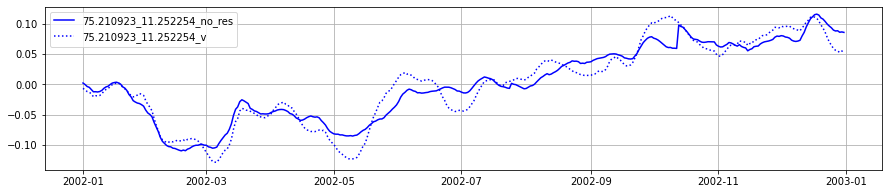

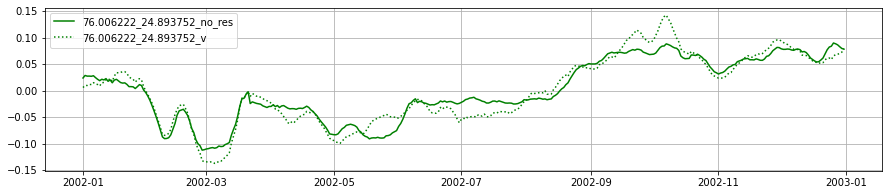

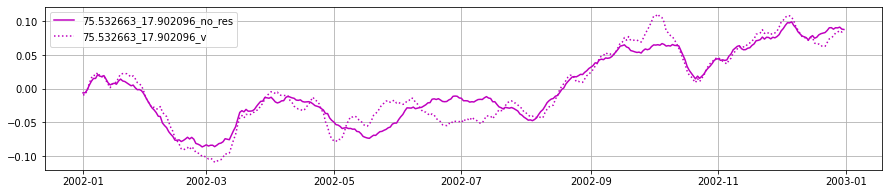

In [12]:
plt.rcParams['figure.figsize'] = [15, 3]

plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_no_res'], label='75.210923_11.252254_no_res', c='b')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v', c='b', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_no_res'], label='76.006222_24.893752_no_res', c='g')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v', c='g', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_no_res'], label='75.532663_17.902096_no_res', c='m')
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v', c='m', linestyle=':')
plt.legend()
plt.grid()
plt.show()

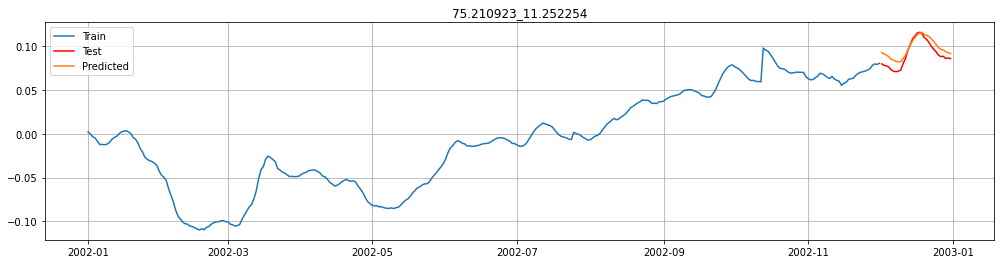

MSE =  6.555361217063974e-05
MAE =  0.00701752817819663
MAPE =  8.494
R^2 =  0.6853264372996875


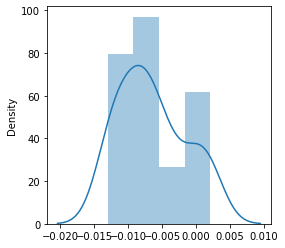

In [16]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

test = df_rean['75.210923_11.252254_no_res'][-30:]
test.index = df_rean['dates'][-30:]
data = df_rean['75.210923_11.252254_no_res'][:-30]
data.index = df_rean['dates'][:-30]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(30)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

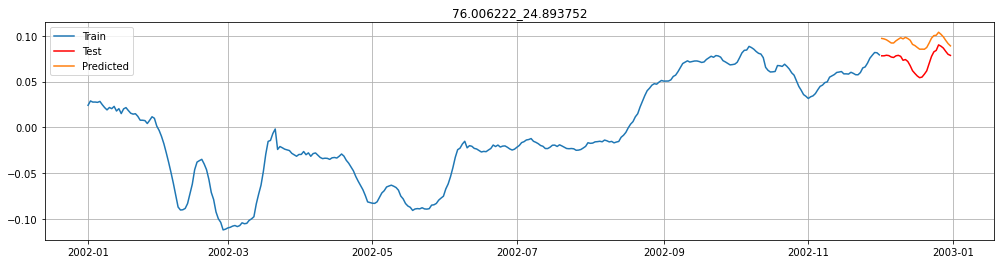

MSE =  0.0004534204783279394
MAE =  0.020317578691763257
MAPE =  29.341
R^2 =  -3.5305800153834355


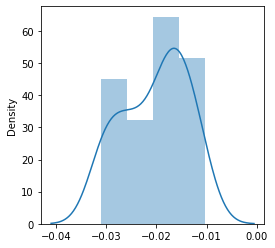

In [17]:
test = df_rean['76.006222_24.893752_no_res'][-30:]
test.index = df_rean['dates'][-30:]
data = df_rean['76.006222_24.893752_no_res'][:-30]
data.index = df_rean['dates'][:-30]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(30)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

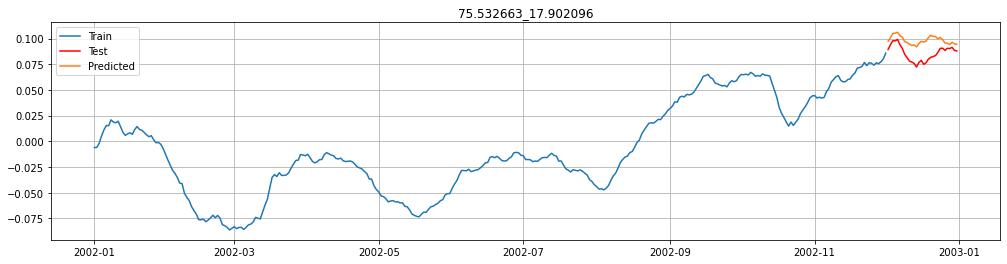

MSE =  0.0001954841724351016
MAE =  0.012669253272484148
MAPE =  15.409
R^2 =  -2.626253654965436


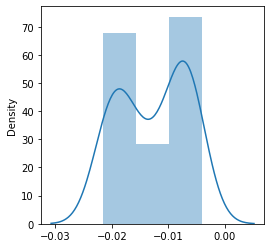

In [18]:
test = df_rean['75.532663_17.902096_no_res'][-30:]
test.index = df_rean['dates'][-30:]
data = df_rean['75.532663_17.902096_no_res'][:-30]
data.index = df_rean['dates'][:-30]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(30)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

Вроде бы уже выглядит неплохо, но недоучет тренда выражается в завышении/занижении значений, при сохранении локальной динамики
___


ВАРИАНТЫ:
___

> 1) экзогенный фактор (NEMO или станции температуры/давления поискать, подвигать сам временной ряд)
>
>     - если берем NEMO, то сначала сравнить тренды, периодичность, сгладить если надо;     
>     - просчитать корреляции с эталонным рядом;
>     
> 2) просто сделать ансамбль из NEMO и того, что намоделировала ARIMA